Environment Setup

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

import pickle

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer


import tensorflow as tf
from tensorflow.keras import regularizers, optimizers, metrics
from tensorflow.keras.optimizers import Adadelta
from tensorflow.keras.optimizers import SGD


import sklearn as sklearn
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

## Dataset load

In [ ]:
review_df = pd.read_csv('/content/drive/MyDrive/data/yelp_review.csv')
review_df.head()

,review_id,user_id,business_id,stars,date,text,useful,funny,cool
0,vkVSCC7xljjrAI4UGfnKEQ,bv2nCi5Qv5vroFiqKGopiw,AEx2SYEUJmTxVVB18LlCwA,5,2016-05-28,Super simple place but amazing nonetheless. It...,0,0,0
1,n6QzIUObkYshz4dz2QRJTw,bv2nCi5Qv5vroFiqKGopiw,VR6GpWIda3SfvPC-lg9H3w,5,2016-05-28,Small unassuming place that changes their menu...,0,0,0
2,MV3CcKScW05u5LVfF6ok0g,bv2nCi5Qv5vroFiqKGopiw,CKC0-MOWMqoeWf6s-szl8g,5,2016-05-28,Lester's is located in a beautiful neighborhoo...,0,0,0
3,IXvOzsEMYtiJI0CARmj77Q,bv2nCi5Qv5vroFiqKGopiw,ACFtxLv8pGrrxMm6EgjreA,4,2016-05-28,Love coming here. Yes the place always needs t...,0,0,0
4,L_9BTb55X0GDtThi6GlZ6w,bv2nCi5Qv5vroFiqKGopiw,s2I_Ni76bjJNK9yG60iD-Q,4,2016-05-28,Had their chocolate almond croissant and it wa...,0,0,0


In [ ]:
business_df = pd.read_csv('/content/drive/MyDrive/data/yelp_academic_dataset_business_3.csv')
business_df.head()

,address,name,stars,longitude,postal_code,business_id,latitude,review_count,categories,city,is_open,hours,attributes,state
0,2818 E Camino Acequia Drive,Arizona Biltmore Golf Clu,3.0,-112.018481,85016,b'1SWheh84yJXfytovILXOAQ',33.522143,5,Golf| Active Life,Phoenix,0,NaN,{GoodForKids: False},AZ
1,30 Eglinton Avenue W,Emerald Chinese Restaurant,2.5,-79.652289,L5R 3E7,b'QXAEGFB4oINsVuTFxEYKFQ',43.605499,128,Specialty Food| Restaurants| Dim Sum| Imported...,Mississauga,1,Monday@ 9:0-0:0| Tuesday@ 9:0-0:0| Wednesday@ ...,"{RestaurantsReservations: True, GoodForMeal: {...",ON
2,10110 Johnston Rd Ste 15,Musashi Japanese Restaurant,4.0,-80.859132,28210,b'gnKjwL_1w79qoiV3IC_xQQ',35.092564,170,Sushi Bars| Restaurants| Japanese,Charlotte,1,Monday@ 17:30-21:30| Wednesday@ 17:30-21:30| T...,"{GoodForKids: True, NoiseLevel: uaverage, Rest...",NC
3,15655 W Roosevelt St Ste 237,Farmers Insurance - Paul Lorenz,5.0,-112.395596,85338,b'xvX2CttrVhyG2z1dFg_0xw',33.455613,3,Insurance| Financial Services,Goodyear,1,Monday@ 8:0-17:0| Tuesday@ 8:0-17:0| Wednesday...,NaN,AZ
4,4209 Stuart Andrew Blvd Ste F,Queen City Plumbing,4.0,-80.887223,28217,b'HhyxOkGAM07SRYtlQ4wMFQ',35.190012,4,Plumbing| Shopping| Local Services| Home Servi...,Charlotte,1,Monday@ 7:0-23:0| Tuesday@ 7:0-23:0| Wednesday...,"{BusinessAcceptsBitcoin: False, ByAppointmentO...",NC


In [ ]:
review_df.shape

(5261668, 9)

In [ ]:
business_df.shape

(192609, 14)

## EDA

<ipython-input-23-dfc97b3fc893>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(top_categories.values()), y=list(top_categories.keys()),palette='viridis')


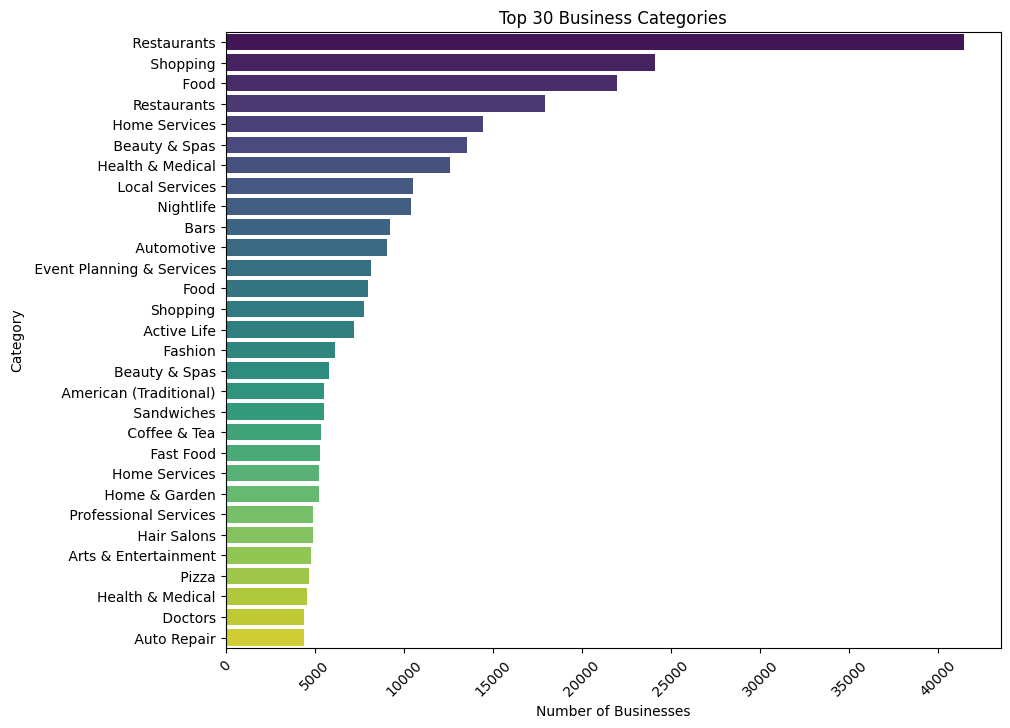

In [ ]:
all_categories = []
for category_list in business_df['categories'].dropna():
    all_categories.extend(category_list.split('|'))

category_counts = Counter(all_categories)

top_categories = dict(category_counts.most_common(30))

plt.figure(figsize=(10, 8))
sns.barplot(x=list(top_categories.values()), y=list(top_categories.keys()),palette='viridis')
plt.title('Top 30 Business Categories')
plt.xlabel('Number of Businesses')
plt.ylabel('Category')
plt.xticks(rotation=45)
plt.show()

<ipython-input-29-eba76631bbe6>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=business_df, x='stars', palette='viridis')


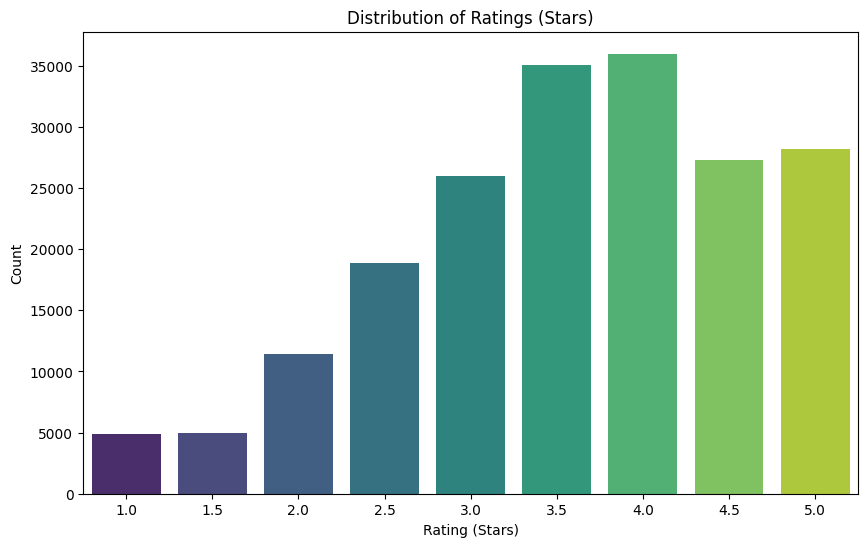

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=business_df, x='stars', palette='viridis')
plt.title('Distribution of Ratings (Stars)')
plt.xlabel('Rating (Stars)')
plt.ylabel('Count')
plt.show()

<ipython-input-30-b797fe650990>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(sorted_cuisines.keys()), y=list(sorted_cuisines.values()), palette='Spectral')


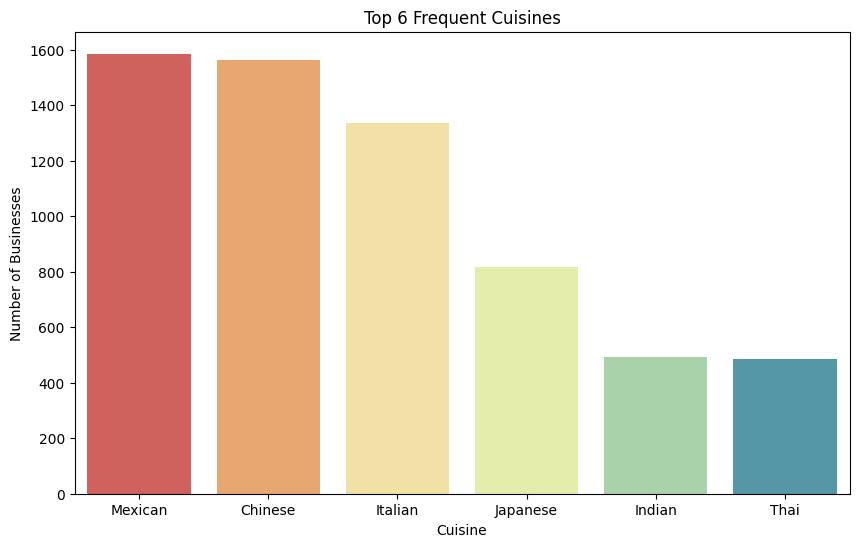

In [ ]:
cuisines = ['Mexican', 'Italian', 'Chinese', 'Japanese', 'Indian', 'Thai']
cuisine_counts = {cuisine: category_counts[cuisine] for cuisine in cuisines if cuisine in category_counts}

# Sorting the cuisines by count
sorted_cuisines = dict(sorted(cuisine_counts.items(), key=lambda item: item[1], reverse=True))

# Creating a bar chart for the top 6 frequent cuisines
plt.figure(figsize=(10, 6))
sns.barplot(x=list(sorted_cuisines.keys()), y=list(sorted_cuisines.values()), palette='Spectral')
plt.title('Top 6 Frequent Cuisines')
plt.xlabel('Cuisine')
plt.ylabel('Number of Businesses')
plt.show()

<ipython-input-31-c804ca10efa2>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_cities.values, y=top_10_cities.index, palette='rocket')


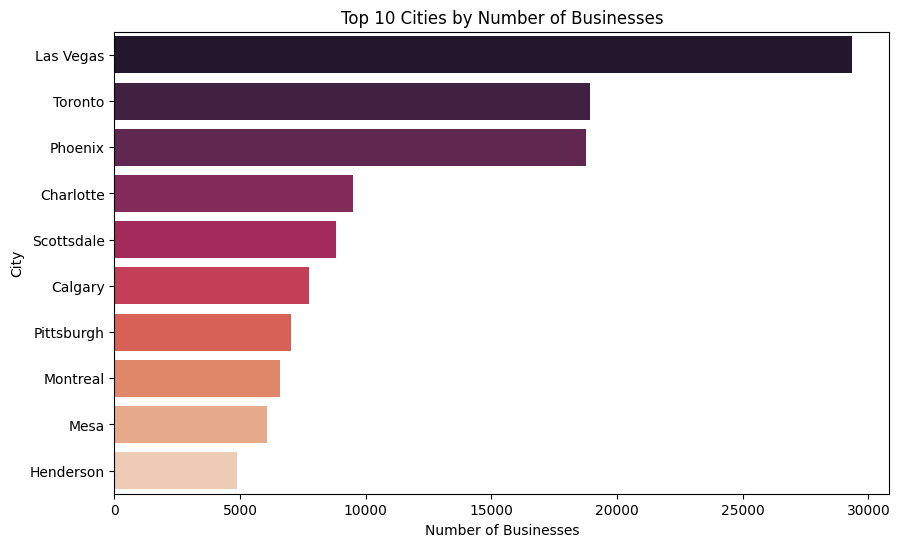

In [ ]:
top_10_cities = business_df['city'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_cities.values, y=top_10_cities.index, palette='rocket')
plt.title('Top 10 Cities by Number of Businesses')
plt.xlabel('Number of Businesses')
plt.ylabel('City')
plt.show()

## Review Cleaning and Extraction

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import string
import pandas as pd
import re
import nltk
nltk.download('omw-1.4')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('words')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


True

In [ ]:
stopword = nltk.corpus.stopwords.words('english')
wn = nltk.WordNetLemmatizer()
ps = nltk.PorterStemmer()
words = set(nltk.corpus.words.words())

def clean_text(text):

    # convert to lower case
    text = text.lower()
    # removing links
    text = re.sub(r"http\S+", "", text)
    text = re.sub(r"www.\S+", "", text)
    # removing punctuations
    text_links_removed = "".join([char for char in text if char not in string.punctuation])
    # removing stop words
    text_cleaned = " ".join([word for word in re.split('\W+', text_links_removed) if word not in stopword])
    # lemmatizing
    text = " ".join([wn.lemmatize(word) for word in re.split('\W+', text_cleaned)])
    return text

In [ ]:
## Do the Classification by ratings

# Only extracted 50000 rows for my model now to test my model and word tokenization
# I will add more samples to increase the model accuracy later


MAX_ROW = 50000
df1 = review_df[review_df["stars"] == 1].iloc[:MAX_ROW]
df2 = review_df[review_df["stars"] == 2].iloc[:MAX_ROW]
df3 = review_df[review_df["stars"] == 3].iloc[:MAX_ROW]
df4 = review_df[review_df["stars"] == 4].iloc[:MAX_ROW]
df5 = review_df[review_df["stars"] == 5].iloc[:MAX_ROW]

In [ ]:
# clean the reviews by removing non-words

for i in df1.index:
    review = clean_text(df1["text"][i])
    df1.loc[i,"Review"] = review
for i in df2.index:
    review = clean_text(df2["text"][i])
    df2.loc[i,"Review"] = review
for i in df3.index:
    review = clean_text(df3["text"][i])
    df3.loc[i,"Review"] = review
for i in df4.index:
    review = clean_text(df4["text"][i])
    df4.loc[i,"Review"] = review
for i in df5.index:
    review = clean_text(df5["text"][i])
    df5.loc[i,"Review"] = review

In [ ]:
## Split the dataset into 50000 for training and 10000 for validation

TRAIN_SIZE = 40000
df1_train = df1.iloc[:TRAIN_SIZE]
df2_train = df2.iloc[:TRAIN_SIZE]
df3_train = df3.iloc[:TRAIN_SIZE]
df4_train = df4.iloc[:TRAIN_SIZE]
df5_train = df5.iloc[:TRAIN_SIZE]
df1_valid = df1.iloc[TRAIN_SIZE:]
df2_valid = df2.iloc[TRAIN_SIZE:]
df3_valid = df3.iloc[TRAIN_SIZE:]
df4_valid = df4.iloc[TRAIN_SIZE:]
df5_valid = df5.iloc[TRAIN_SIZE:]


In [ ]:
## Concatenate the training datasets
train_rev_df = pd.concat([df1_train.loc[:, "Review"], df2_train.loc[:, "Review"], df3_train.loc[:, "Review"], df4_train.loc[:, "Review"], df5_train.loc[:, "Review"]])
train_star_df = pd.concat([df1_train.loc[:, "stars"], df2_train.loc[:, "stars"], df3_train.loc[:, "stars"], df4_train.loc[:, "stars"], df5_train.loc[:, "stars"]])


# Concatenate the validation datasets
valid_rev_df = pd.concat([df1_valid.loc[:, "Review"], df2_valid.loc[:, "Review"], df3_valid.loc[:, "Review"], df4_valid.loc[:, "Review"], df5_valid.loc[:, "Review"]])
valid_star_df = pd.concat([df1_valid.loc[:, "stars"], df2_valid.loc[:, "stars"], df3_valid.loc[:, "stars"], df4_valid.loc[:, "stars"], df5_valid.loc[:, "stars"]])


# Store the reviews and stars in numpy array list
train_rev = np.array(train_rev_df.tolist())
train_star = np.array(train_star_df.tolist())
valid_rev = np.array(valid_rev_df.tolist())
valid_star = np.array(valid_star_df.tolist())

In [ ]:
train_rev

array(['thought tidy flower great reputation florist guess wrong valentine day boyfriend ordered rose tidy however flower delivered ordered placed order long stem rose mixed orchid charged showed small vase 4 short cut rose green table ornament really valentine day flower speaking another friend something similar happened fiancee ordered dozen rose valentine day germany surprise never showed called complaint actually called friend confirm whether received flower didnt said would resend deliver wrong place understanding valentine day busiest day florist mistake happen way handled would expected florist nature',
       'trying book appt use voucher month countless phone call response yet agree buyer beware warning wish review place posted previous purchase voucher',
       'really excited hear restaurant coming toronto finally opened friend really excited try place service great felt like forgotten u didnt care service everything came one time friend ordered ginger beer came two separate

In [ ]:
train_rev.shape

(200000,)

In [ ]:
train_star

array([1, 1, 1, ..., 5, 5, 5])

In [ ]:
train_star

array([1, 1, 1, ..., 5, 5, 5])

## Word Tokenization

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer  = Tokenizer()
tokenizer.fit_on_texts(train_rev)
word_index = tokenizer.word_index
vocabulary = len(word_index)
train_seq = tokenizer.texts_to_sequences(train_rev)
valid_seq = tokenizer.texts_to_sequences(valid_rev)

max_len = 200
train_seq = pad_sequences(train_seq, padding='post', maxlen=max_len)
valid_seq = pad_sequences(valid_seq, padding='post', maxlen=max_len)

In [ ]:
train_seq

array([[   166,   6176,   1910, ...,      0,      0,      0],
       [   257,    715,   2411, ...,      0,      0,      0],
       [    13,    635,    712, ...,      0,      0,      0],
       ...,
       [192370,    455,     59, ...,      0,      0,      0],
       [   262,    668,  14975, ...,      0,      0,      0],
       [    52,   1219,    304, ...,      0,      0,      0]], dtype=int32)

In [ ]:
train_seq.shape

(200000, 200)

In [ ]:
from keras.preprocessing.text import one_hot

train_one_hot = []
for t in train_rev:
  train_one_hot.append(one_hot(t, len(word_index)))
train_one_hot = pad_sequences(train_one_hot, maxlen=max_len, padding='post')

valid_one_hot = []
for v in valid_rev:
  valid_one_hot.append(one_hot(v, len(word_index)))
valid_one_hot = pad_sequences(valid_one_hot, maxlen=max_len, padding='post')

In [ ]:
train_star = tf.one_hot(train_star, 6)
valid_star = tf.one_hot(valid_star, 6)

## Build the LSTM model for the review stars classification


In [ ]:
import tensorflow as tf
from tensorflow.keras import regularizers, optimizers, metrics
from tensorflow.keras.optimizers import Adadelta
from tensorflow.keras.optimizers import SGD

tf.random.set_seed(42)

def build_model():
    model = tf.keras.Sequential()
    # add embedding layer
    model.add(tf.keras.layers.Embedding(vocabulary+1, 8, input_length=max_len))
    # add Bidirectional LSTM Layer
    model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)))
    model.add(tf.keras.layers.Flatten())

    # Dense layer to help the model learning more complex relationships between input and output
    model.add(tf.keras.layers.Dense(64, activation="relu"))
    # Dropout layer to prevent overfitting
    model.add(tf.keras.layers.Dropout(0.5))
    model.add(tf.keras.layers.BatchNormalization())

    # Final output layer
    model.add(tf.keras.layers.Dense(6, activation="softmax"))
    # use a loss function, optimizer as adam to compile and evaluate model on accuracy
    model.compile(loss="categorical_crossentropy", optimizer="Adam", metrics=["accuracy"])

    return model

In [ ]:
model = build_model()
history = model.fit(train_seq, train_star, epochs=10, validation_data=(valid_seq, valid_star), shuffle=True)

Epoch 1/10
6250/6250 [==============================] - 1258s 201ms/step - loss: 1.0953 - accuracy: 0.5245 - val_loss: 0.9551 - val_accuracy: 0.5837
Epoch 2/10
6250/6250 [==============================] - 1266s 203ms/step - loss: 0.9343 - accuracy: 0.6015 - val_loss: 0.9482 - val_accuracy: 0.5960
Epoch 3/10
6250/6250 [==============================] - 1270s 203ms/step - loss: 0.8650 - accuracy: 0.6358 - val_loss: 0.9314 - val_accuracy: 0.6014
Epoch 4/10
6250/6250 [==============================] - 1275s 204ms/step - loss: 0.8038 - accuracy: 0.6703 - val_loss: 0.9335 - val_accuracy: 0.6022
Epoch 5/10
6250/6250 [==============================] - 1260s 202ms/step - loss: 0.7448 - accuracy: 0.7025 - val_loss: 0.9743 - val_accuracy: 0.5962
Epoch 6/10
6250/6250 [==============================] - 1267s 203ms/step - loss: 0.6887 - accuracy: 0.7328 - val_loss: 1.0188 - val_accuracy: 0.5924
Epoch 7/10
6250/6250 [==============================] - 1254s 201ms/step - loss: 0.6354 - accuracy: 0.7564

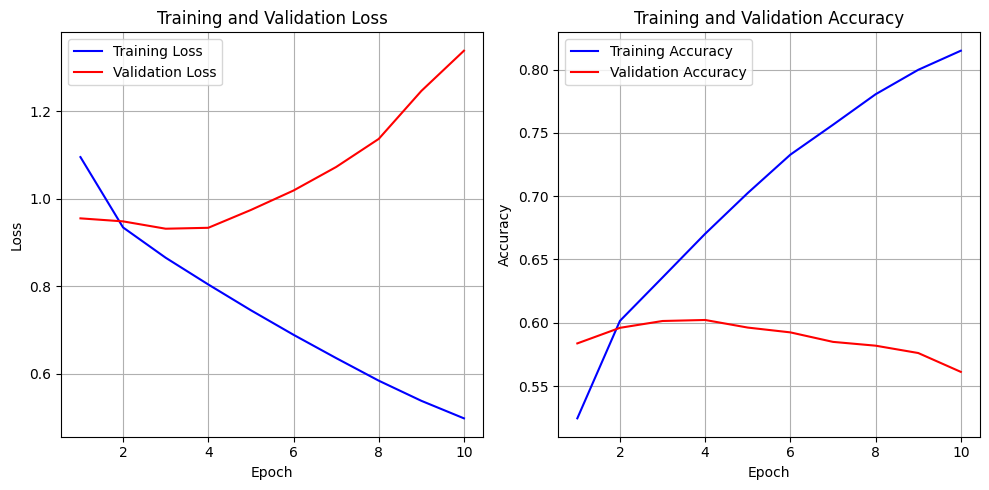

In [ ]:
epochs = range(1, 11)
loss = [1.0953, 0.9343, 0.8650, 0.8038, 0.7448, 0.6887, 0.6354, 0.5837, 0.5376, 0.4975]
val_loss = [0.9551, 0.9482, 0.9314, 0.9335, 0.9743, 1.0188, 1.0726, 1.1369, 1.2466, 1.3387]
accuracy = [0.5245, 0.6015, 0.6358, 0.6703, 0.7025, 0.7328, 0.7564, 0.7805, 0.7998, 0.8149]
val_accuracy = [0.5837, 0.5960, 0.6014, 0.6022, 0.5962, 0.5924, 0.5849, 0.5819, 0.5761, 0.5612]

# Plotting Loss
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, loss, 'b-', label='Training Loss')
plt.plot(epochs, val_loss, 'r-', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid()

# Plotting Accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, accuracy, 'b-', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'r-', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.grid()
plt.show()

## Model Loading

In [ ]:
import pickle
pickle.dump(model, open('lstm', 'wb'))

In [ ]:
import pickle
saved_lstm = pickle.load(open('lstm', 'rb'))

## Evaluation

In [ ]:
# K-fold cross validation for LSTM model

k = 5 # set the fold k =5
kf = KFold(n_splits=k, random_state=1,shuffle=True)
model = saved_lstm

cvscores = []
x = np.append(train_rev,valid_rev)
y = np.append(train_star,valid_star)

for train, test in kf.split(x,y):

    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = None)

    train_seq = tokenizer.texts_to_sequences(X_train)
    valid_seq = tokenizer.texts_to_sequences(X_test)

    X_train = pad_sequences(train_seq, padding='post', maxlen=max_len)
    X_test = pad_sequences(valid_seq, padding='post', maxlen=max_len)

    y_train = tf.one_hot(y_train, 6)
    y_test = tf.one_hot(y_test, 6)


    scores = saved_lstm.evaluate(X_test, y_test, verbose=1)
    print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
    cvscores.append(scores[1] * 100)
print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores), np.std(cvscores)))

1563/1563 [==============================] - 49s 31ms/step - loss: 0.6015 - accuracy: 0.7849
accuracy: 78.49%
1563/1563 [==============================] - 49s 31ms/step - loss: 0.6054 - accuracy: 0.7842
accuracy: 78.42%
1563/1563 [==============================] - 52s 34ms/step - loss: 0.6051 - accuracy: 0.7824
accuracy: 78.24%
1563/1563 [==============================] - 48s 31ms/step - loss: 0.6076 - accuracy: 0.7827
accuracy: 78.27%
1563/1563 [==============================] - 48s 31ms/step - loss: 0.6060 - accuracy: 0.7830
accuracy: 78.30%
78.34% (+/- 0.09%)


## Recommendation

In [ ]:
def predict_review(review):
    review = clean_text(review)
    review_seq = tokenizer.texts_to_sequences([review])
    review_seq = pad_sequences(review_seq, padding='post', maxlen=max_len)
    return (saved_lstm.predict(review_seq) > 0.5).astype("int32")



In [ ]:
review = "The pretzel is good.A nice French restaurant in the Park Slope."
returned = predict_review(review)
for i, item in enumerate(returned[0]):
    if item == 1:
        prediction = i
        break
print(f'{review[:100]} -> {prediction:.2f}')

1/1 [==============================] - 0s 35ms/step
The pretzel is good.A nice French restaurant in the Park Slope. -> 4.00


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd
import numpy as np

def clean_categories(text):
    if pd.isna(text):  #NaN check
        return ' '
    # Convert to lowercase and remove "|"
    cleaned_text = text.lower().replace('|', ' ')
    return cleaned_text


df = business_df[business_df['stars'] >= 3]
df = df[df['city'] == 'Las Vegas']
# Apply the cleaning function to the 'categories' column
df['cleaned_categories'] = df['categories'].apply(clean_categories)

vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = vectorizer.fit_transform(df['cleaned_categories'])

vectorizer.fit(df['cleaned_categories'])
text = vectorizer.transform(df['cleaned_categories'])

cosine_sim = cosine_similarity(tfidf_matrix)

def get_recommendations(name, cosine_sim=cosine_sim):
    idx =  df[df['name'] == name].index[0]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores= sim_scores[1:11]
    score = list((cosine_sim[idx]))
    score = sorted(score, reverse=True)
    score= score[1:11]
    business_indices = [i[0] for i in sim_scores]
    recommendations = df['name'].iloc[business_indices]
    longitude = df['longitude'].iloc[business_indices]
    latitude = df['latitude'].iloc[business_indices]
    return pd.DataFrame({'name':recommendations,
                         'score':score,
                         'longitude': longitude,
                         'latitude': latitude
                         })


In [ ]:
name = "La Creperie"
recommendations = get_recommendations(name,cosine_sim)
print(f"Recommendations for {name} from high to low:")
print(recommendations)

Recommendations for La Creperie from high to low:
                         name     score   longitude   latitude
49235           Pretzel Maker  1.000000 -115.197260  36.172534
54436        Wetzels Pretzels  1.000000 -115.185025  36.116382
108204  Auntie Annes Pretzels  1.000000 -115.136987  36.086168
171385             Pretzeland  1.000000 -115.174252  36.091267
180714       Wetzels Pretzels  1.000000 -115.203082  36.277652
16912   Auntie Annes Pretzels  0.875283 -115.172247  36.066778
180575       Wetzels Pretzels  0.875283 -115.177063  36.068267
93421        New York Pretzel  0.846407 -115.167443  36.102616
118940    German Bread Bakery  0.846407 -115.119204  36.021162
134872       New York Pretzel  0.846407 -115.169758  36.121558


In [ ]:
import folium

m = folium.Map(location=[recommendations['latitude'].mean(), recommendations['longitude'].mean()], zoom_start=5)

# Add a marker for each location in the DataFrame
for index, row in recommendations.iterrows():
    folium.Marker([row['latitude'], row['longitude']], popup=row['name']).add_to(m)

# Display the map
m